<a href="https://colab.research.google.com/github/Maria-mbugua/IPWeek6-Core/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Defining the Question**


You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training). You have two possible approaches (polynomial and logistic approaches) given the datasets that will be provided


## a) Specifying the Question

Mchezo pesa is a football analyst company in East Africa. Mchezo-Pesa would like to predict the result of a game based whether the teams playing are in their home country or not and whether the game is friendly or not.

## b) Defining the metrics for success


This project will be successful when:
1)We accurately predict the winning team based on the two factors:

   a)Home team or away team

   b)The type of tournament 

2)The model achieves atleast 80% accuracy

3)Have the lowest RMSE score possible

## c)  Understanding the context

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.Predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

## e) Recording the Experimental Design


1. reading in the datasets
2. checking the data for duplicates and missinng data
3. dropping of duplicates and removal filling in of missing data values with zero
4. Finding  and dealing with outliers, anomalies, and missing data within the dataset.
5. Performing of EDA recording of observations.
6. Implementing the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
8. Perform any necessary feature engineering 

9. Check of multicollinearity

10. Start building the model, Cross-validate the model

11. Compute RMSE

12. Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test

13. Perform appropriate regressions on the data including your justification

14. Challenge your solution by providing insights on how you can make improvements.

## e) Relevance of the data

The data that was used for survey was obtained from an open datasource. This data is an aggregation by day of the number of goals scored and rankings of countries in the men's FIFA team. With it's a model that determines which team gets to be ranked where and how according to the years and goals.

# **2) Reading the Data**

In [103]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [104]:
# reading datasets

data = pd.read_csv('fifa_ranking.csv')


In [105]:
# reading datasets

data1 = pd.read_csv('results.csv')
data1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


In [106]:
# Loading the FiFa results Dataset while specifying the datetime column
data1 = pd.read_csv('results.csv',parse_dates=['date'])
data1.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# **3) Cleaning the Data**

In [107]:
# Renaming the country full column to country
data.rename(columns= {'country_full':'country'}, inplace = True)

In [108]:
# Determining the no. of records in our dataset and the respective datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country                  57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [109]:
#checking for duplicates
data.duplicated().sum()



37

In [110]:
#dropping the duplicated columns in the ranking dataset
#data.drop_duplicates(subset = None, keep = 'first', inplace = True)
#data.shape

In [111]:
# checking for duplicates
data.duplicated().any()

True

In [112]:
# drop all duplicates
data.drop_duplicates(inplace=True)

In [113]:
data.duplicated().sum()

0

In [114]:
# checking for duplicates
data1.duplicated().any()

False

In [115]:
# Previewing the top of the ranking dataset
data.head(5)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [116]:
# Previewing the bottom of the ranking dataset
data.tail(5)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [117]:
# Checking the properties of the ranking dataset
data.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000
mean,101.618118,121.971151,332.339965,-0.009938,61.751362,61.751362,60.953507,30.476830,59.734768,17.920469,59.114466,11.822922
std,58.635096,260.479191,302.964176,5.802788,138.042006,138.042006,137.712945,68.856514,136.319119,40.895761,135.540135,27.108034
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,91.500000,525.000000,1.000000,30.447500,30.447500,26.400000,13.200000,21.250000,6.380000,20.795000,4.162500
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [118]:
# checking for null values
data.isnull().any()

rank                       False
country                    False
country_abrv               False
total_points               False
previous_points            False
rank_change                False
cur_year_avg               False
cur_year_avg_weighted      False
last_year_avg              False
last_year_avg_weighted     False
two_year_ago_avg           False
two_year_ago_weighted      False
three_year_ago_avg         False
three_year_ago_weighted    False
confederation              False
rank_date                  False
dtype: bool

In [119]:
# Merging the  datasets
frames = [data, data1]
df = pd.concat(frames)
df

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1.0,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Italy,ITA,0.0,57.0,0.0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Switzerland,SUI,0.0,50.0,9.0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Sweden,SWE,0.0,55.0,0.0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Argentina,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,...,CONMEBOL,1993-08-08,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-18,American Samoa,Tahiti,8.0,1.0,Pacific Games,Apia,True
40835,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-18,Fiji,Solomon Islands,4.0,4.0,Pacific Games,Apia,True
40836,NaN,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-19,Senegal,Algeria,0.0,1.0,African Cup of Nations,Cairo,True
40837,NaN,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-19,Tajikistan,North Korea,0.0,1.0,Intercontinental Cup,Ahmedabad,True


In [120]:
# Displaying the top rows of the dataset
df.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1.0,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Italy,ITA,0.0,57.0,0.0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Switzerland,SUI,0.0,50.0,9.0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Sweden,SWE,0.0,55.0,0.0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Argentina,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,...,CONMEBOL,1993-08-08,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
# Checking for null values
df.isnull().any()

rank                        True
country                    False
country_abrv                True
total_points                True
previous_points             True
rank_change                 True
cur_year_avg                True
cur_year_avg_weighted       True
last_year_avg               True
last_year_avg_weighted      True
two_year_ago_avg            True
two_year_ago_weighted       True
three_year_ago_avg          True
three_year_ago_weighted     True
confederation               True
rank_date                   True
date                        True
home_team                   True
away_team                   True
home_score                  True
away_score                  True
tournament                  True
city                        True
neutral                     True
dtype: bool

In [122]:
# Filling null values with zero
df.fillna(0, inplace=True)

In [123]:
# Checking the shape of the dataset
df.shape

(98595, 24)

In [124]:
# Reading the columns
df.columns

Index(['rank', 'country', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'city', 'neutral'],
      dtype='object')

In [125]:
# Displaying the bottom rows of our dataset
df.tail()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
40834,0.0,Samoa,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,2019-07-18 00:00:00,American Samoa,Tahiti,8.0,1.0,Pacific Games,Apia,True
40835,0.0,Samoa,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,2019-07-18 00:00:00,Fiji,Solomon Islands,4.0,4.0,Pacific Games,Apia,True
40836,0.0,Egypt,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,2019-07-19 00:00:00,Senegal,Algeria,0.0,1.0,African Cup of Nations,Cairo,True
40837,0.0,India,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,2019-07-19 00:00:00,Tajikistan,North Korea,0.0,1.0,Intercontinental Cup,Ahmedabad,True
40838,0.0,Samoa,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,2019-07-20 00:00:00,Papua New Guinea,Fiji,1.0,1.0,Pacific Games,Apia,True


In [126]:
# Displaying a random sample
df.sample(7)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
44079,150.0,Solomon Islands,SOL,165.52,166.0,0.0,128.21,128.21,74.62,37.31,...,OFC,2013-01-17,0,0,0,0.0,0.0,0,0,0
19922,145.0,Maldives,MDV,0.00,240.0,6.0,0.00,0.00,0.00,0.00,...,AFC,2003-02-19,0,0,0,0.0,0.0,0,0,0
11796,131.0,Tajikistan,TJK,0.00,253.0,-2.0,0.00,0.00,0.00,0.00,...,AFC,1999-09-15,0,0,0,0.0,0.0,0,0,0
12968,0.0,Oman,0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,0,0,1984-03-13 00:00:00,Qatar,United Arab Emirates,0.0,1.0,Gulf Cup,Muscat,True
55470,206.0,Somalia,SOM,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,CAF,2017-07-06,0,0,0,0.0,0.0,0,0,0
49817,13.0,Italy,ITA,1085.01,1085.0,0.0,518.05,518.05,557.81,278.90,...,UEFA,2015-05-07,0,0,0,0.0,0.0,0,0,0
14322,0.0,Austria,0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,0,0,1986-10-15 00:00:00,Austria,Albania,3.0,0.0,UEFA Euro qualification,Graz,False


In [127]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98595 entries, 0 to 40838
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     98595 non-null  float64
 1   country                  98595 non-null  object 
 2   country_abrv             98595 non-null  object 
 3   total_points             98595 non-null  float64
 4   previous_points          98595 non-null  float64
 5   rank_change              98595 non-null  float64
 6   cur_year_avg             98595 non-null  float64
 7   cur_year_avg_weighted    98595 non-null  float64
 8   last_year_avg            98595 non-null  float64
 9   last_year_avg_weighted   98595 non-null  float64
 10  two_year_ago_avg         98595 non-null  float64
 11  two_year_ago_weighted    98595 non-null  float64
 12  three_year_ago_avg       98595 non-null  float64
 13  three_year_ago_weighted  98595 non-null  float64
 14  confederation         

In [128]:
# Checking for duplicates
df.duplicated().any()

False

In [129]:
# drop all duplicates
df.drop_duplicates(inplace=True)

In [130]:
# Dealing with the Missing Data
df.isnull().sum()

rank                       0
country                    0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
neutral                    0
dtype: int64

In [131]:
# dealing with outliers
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# 
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# 
print(df1.shape)

# Printing the shape of our old dataset
#
print(df.shape)

(36950, 24)
(98595, 24)


In [132]:
# top football confederations
print('Total number of confederations: {0}'.format(df1['confederation'].nunique()))
print(df1['confederation'].value_counts().head(10))
print('--'*40)

Total number of confederations: 7
0           26356
CAF          2516
UEFA         2416
AFC          2220
CONCACAF     2143
OFC           761
CONMEBOL      538
Name: confederation, dtype: int64
--------------------------------------------------------------------------------


#**4) Exploratory Data Analysis**

## a) Univariate Analysis

Text(0.5, 1.0, 'Distribution of countries per their homescores')

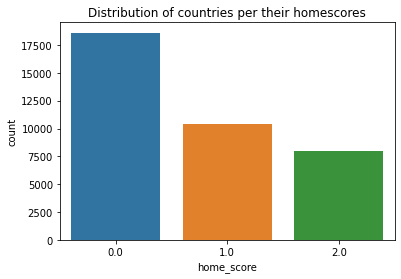

In [133]:
# Histogram of the home scores of different countries
ax = sns.countplot(df1['home_score'], order = df1['home_score'].value_counts().index)
plt.title('Distribution of countries per their homescores')

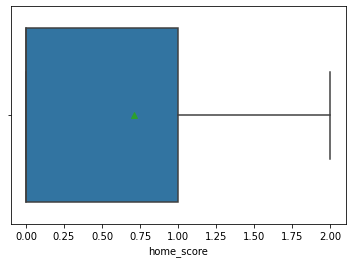

In [134]:
# Boxplot of home score
sns.boxplot(df1['home_score'], showmeans=True)

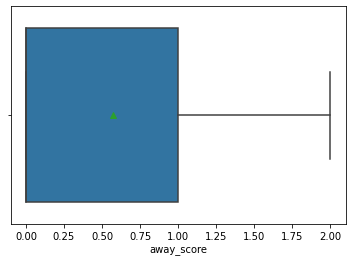

In [135]:
# Boxplot of away scores
sns.boxplot(df1['away_score'], showmeans=True)

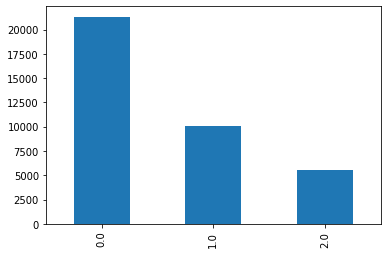

In [136]:
# Bar plot of away scores
df1['away_score'].value_counts().sort_index().plot.bar()

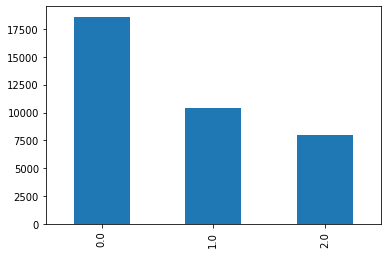

In [137]:
# Bar plot of home scores
df1['home_score'].value_counts().sort_index().plot.bar()

In [138]:
# Skewness
print(df1.skew())

rank                       1.648792
total_points               0.000000
previous_points            2.570058
rank_change                0.000000
cur_year_avg               0.000000
cur_year_avg_weighted      0.000000
last_year_avg              0.000000
last_year_avg_weighted     0.000000
two_year_ago_avg           0.000000
two_year_ago_weighted      0.000000
three_year_ago_avg         0.000000
three_year_ago_weighted    0.000000
home_score                 0.562271
away_score                 0.864580
neutral                    1.707602
dtype: float64


In [139]:
# Kurtosis
print(df1.kurt())

rank                       1.084930
total_points               0.000000
previous_points            5.557539
rank_change                0.000000
cur_year_avg               0.000000
cur_year_avg_weighted      0.000000
last_year_avg              0.000000
last_year_avg_weighted     0.000000
two_year_ago_avg           0.000000
two_year_ago_weighted      0.000000
three_year_ago_avg         0.000000
three_year_ago_weighted    0.000000
home_score                -1.210674
away_score                -0.671123
neutral                    0.915955
dtype: float64


In [140]:
df1.columns

Index(['rank', 'country', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'city', 'neutral'],
      dtype='object')

In [141]:
# Dropping unnecessary columns
to_drop = ['rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted']
df1.drop(to_drop, axis=1, inplace=True)

In [142]:
# Shape of our dataset
df1.shape

(36950, 15)

## b) Bivariate Analysis

In [143]:
# Calculating the pearson coefficient
pearson_coeff = df1["home_score"].corr(df1["away_score"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df1["home_score"].corr(df1["away_score"])
print(coeff)

0.27579386325309785
0.27579386325309785


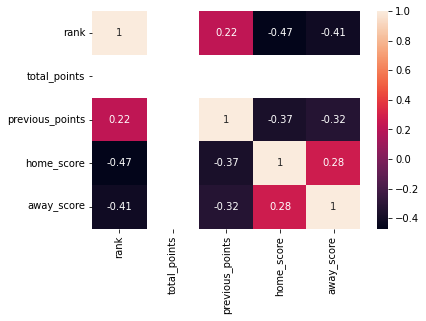

In [144]:
# heatmap
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [145]:
# Displaying a sample of the dataset
df1.sample(6)

,rank,country,country_abrv,total_points,previous_points,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
22147,0.0,Eswatini,0,0.0,0.0,0,0,1999-07-18 00:00:00,Eswatini,Zimbabwe,1.0,1.0,COSAFA Cup,Lobamba,False
24939,52.0,Bahrain,BHR,0.0,591.0,AFC,2005-03-23,0,0,0,0.0,0.0,0,0,0
30378,147.0,Tajikistan,TJK,0.0,122.0,AFC,2007-06-13,0,0,0,0.0,0.0,0,0,0
23448,202.0,Turks and Caicos Islands,TCA,0.0,26.0,CONCACAF,2004-07-07,0,0,0,0.0,0.0,0,0,0
11374,0.0,Haiti,0,0.0,0.0,0,0,1980-09-12 00:00:00,Haiti,Curaçao,1.0,0.0,FIFA World Cup qualification,Port-au-Prince,False
34408,0.0,Jordan,0,0.0,0.0,0,0,2012-09-11 00:00:00,Jordan,Australia,2.0,1.0,FIFA World Cup qualification,Amman,False


In [146]:
# Displaying the dataset information
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36950 entries, 0 to 40838
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             36950 non-null  float64
 1   country          36950 non-null  object 
 2   country_abrv     36950 non-null  object 
 3   total_points     36950 non-null  float64
 4   previous_points  36950 non-null  float64
 5   confederation    36950 non-null  object 
 6   rank_date        36950 non-null  object 
 7   date             36950 non-null  object 
 8   home_team        36950 non-null  object 
 9   away_team        36950 non-null  object 
 10  home_score       36950 non-null  float64
 11  away_score       36950 non-null  float64
 12  tournament       36950 non-null  object 
 13  city             36950 non-null  object 
 14  neutral          36950 non-null  object 
dtypes: float64(5), object(10)
memory usage: 5.5+ MB


In [147]:
# Correlation of the home score and away score
df1['home_score'].corr(df1['away_score'])

0.27579386325309785

## c) Multivariate Analysis

### Factor Analysis

In [151]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

#The p vlaue is 0 the observed matrix is not an identity matrix.

(nan, nan)

### Principal Component Analysis

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1[['home_score','away_score']])
scaled_data = scaler.transform(df1[['home_score','away_score']])

In [153]:
scaled_data = pd.DataFrame(scaled_data)

In [154]:
df2 = scaled_data.fillna(0)
df2.head()

,0,1
0,-0.892806,-0.776997
1,-0.892806,-0.776997
2,-0.892806,-0.776997
3,-0.892806,-0.776997
4,-0.892806,-0.776997


In [155]:
from sklearn.decomposition import PCA
logmodel = PCA(n_components=2)
logmodel.fit(df2)
pca_x = logmodel.transform(df2)

In [156]:
pca_x.shape

(36950, 2)

In [157]:
df3 = pd.DataFrame(logmodel.components_, columns = ['home_score','away_score'])

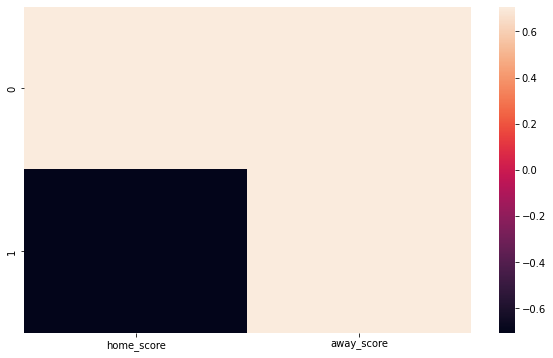

In [158]:
plt.figure(figsize=(10,6))
sns.heatmap(df3)

Text(0.5, 0, 'First Principle Component ')

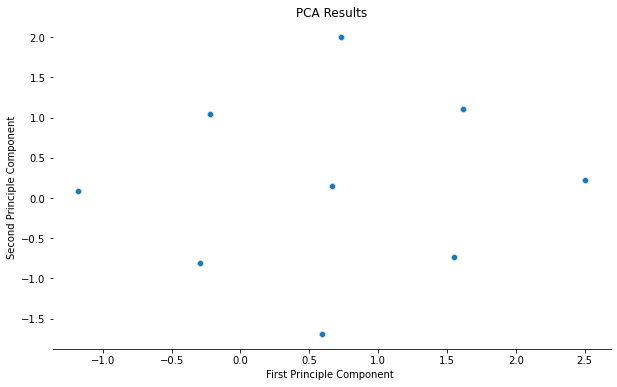

In [159]:
plt.figure(figsize=(10,6))
ty=sns.scatterplot(pca_x[:,0], pca_x[:,1])
sns.despine(left=True)
ty.set_title('PCA Results')
ty.set_ylabel('Second Principle Component ')
ty.set_xlabel('First Principle Component ')

In [160]:
pca_x

array([[-1.18072883,  0.08188936],
       [-1.18072883,  0.08188936],
       [-1.18072883,  0.08188936],
       ...,
       [-0.22416948,  1.03844871],
       [-0.22416948,  1.03844871],
       [ 0.66217717,  0.15210207]])

# **5) Polynomial Regression Analysis**